## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
dataset=pd.read_csv('childbirth.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BabyId                              1773 non-null   object 
 1   FirsttimeParent                     1773 non-null   int64  
 2   Crying date                         1773 non-null   object 
 3   Crying time                         1773 non-null   object 
 4   Crying seconds                      73 non-null     float64
 5   Feeding date                        1773 non-null   object 
 6   Feeding time                        1773 non-null   object 
 7   Bottle amount                       1044 non-null   float64
 8   PumpingDate                         1773 non-null   object 
 9   PumpingTimePumpingLeftPumpingRight  1773 non-null   object 
 10  Pumping Left                        61 non-null     float64
 11  PumpingRight                        68 non-

In [4]:
dataset.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,05-08-2015,20:31:47,900.0,05-08-2015,20:31:47,180.0,05-08-2015,20:31:47,40.0,30.0,05-08-2015,20:31:47,5153.979043
1,HPT2_NR_16,1,05-08-2015,23:33:46,600.0,05-08-2015,23:33:46,180.0,05-08-2015,23:33:46,50.0,35.0,05-08-2015,23:33:46,33365.111960
2,HPT2_NR_16,1,06-08-2015,10:20:00,916.0,06-08-2015,10:20:00,180.0,06-08-2015,10:20:00,NaN,NaN,06-08-2015,10:20:00,2100.000000
3,HPT2_NR_16,1,06-08-2015,11:30:00,300.0,06-08-2015,11:30:00,35.0,06-08-2015,11:30:00,NaN,NaN,06-08-2015,11:30:00,1200.000000
4,HPT2_NR_16,1,06-08-2015,12:15:00,600.0,06-08-2015,12:15:00,180.0,06-08-2015,12:15:00,NaN,NaN,06-08-2015,12:15:00,4800.000000


In [5]:
dataset.shape

(1773, 15)

In [6]:
dataset.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,73.000000,1044.000000,61.000000,68.000000,996.000000
mean,0.840948,1457.206746,127.203065,48.360656,38.014706,9896.331302
std,0.365828,2059.022294,36.557694,42.600091,25.394495,8834.708534
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492544
25%,1.000000,300.000000,100.000000,25.000000,20.000000,3599.739393
50%,1.000000,900.000000,120.000000,40.000000,32.500000,7701.496467
75%,1.000000,1800.000000,150.000000,55.000000,55.000000,12600.000000
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


In [7]:
dataset.columns

Index(['BabyId', 'FirsttimeParent', 'Crying date', 'Crying time',
       'Crying seconds', 'Feeding date', 'Feeding time', 'Bottle amount',
       'PumpingDate', 'PumpingTimePumpingLeftPumpingRight', 'Pumping Left',
       'PumpingRight', 'SleepingDate', 'SleepingTime', 'SleepingSecond'],
      dtype='object')

## Handling Null Values:

In [8]:
dataset.isnull().sum()

BabyId                                   0
FirsttimeParent                          0
Crying date                              0
Crying time                              0
Crying seconds                        1700
Feeding date                             0
Feeding time                             0
Bottle amount                          729
PumpingDate                              0
PumpingTimePumpingLeftPumpingRight       0
Pumping Left                          1712
PumpingRight                          1705
SleepingDate                             0
SleepingTime                             0
SleepingSecond                         777
dtype: int64

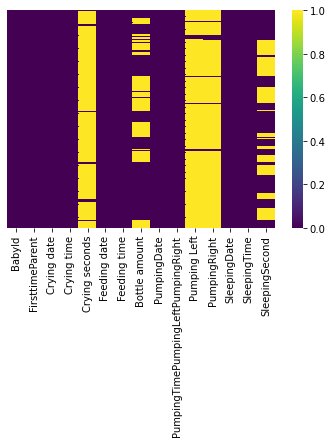

In [9]:
sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

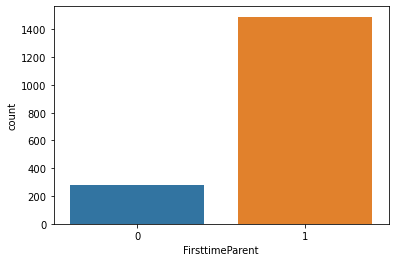

In [10]:
sns.countplot(x='FirsttimeParent',data=dataset)

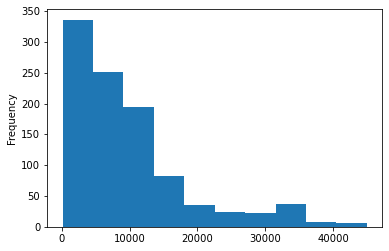

In [11]:
dataset['SleepingSecond'].plot.hist()

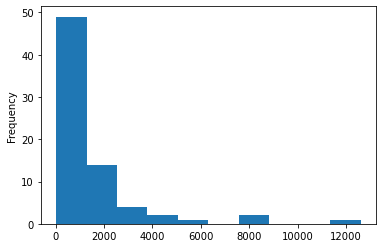

In [12]:
dataset['Crying seconds'].plot.hist()

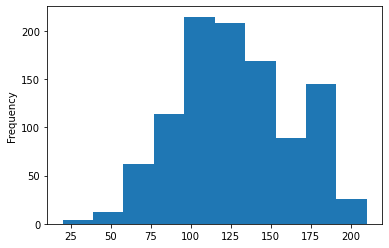

In [13]:
dataset['Bottle amount'].plot.hist()

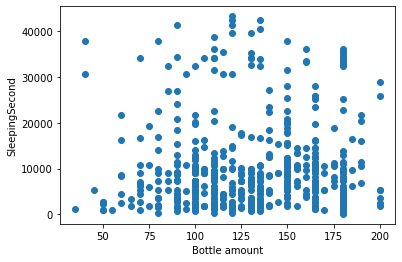

In [14]:
plt.xlabel('Bottle amount')
plt.ylabel('SleepingSecond')
plt.scatter(dataset['Bottle amount'],dataset['SleepingSecond'])

In [15]:
dataset.corr()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
FirsttimeParent,1.000000,NaN,-0.036233,NaN,NaN,-0.050108
Crying seconds,NaN,1.000000,-0.176711,0.052093,0.000000,0.003579
Bottle amount,-0.036233,-0.176711,1.000000,0.121739,-0.028806,0.025459
Pumping Left,NaN,0.052093,0.121739,1.000000,0.165229,-0.089921
PumpingRight,NaN,0.000000,-0.028806,0.165229,1.000000,-0.095137
SleepingSecond,-0.050108,0.003579,0.025459,-0.089921,-0.095137,1.000000


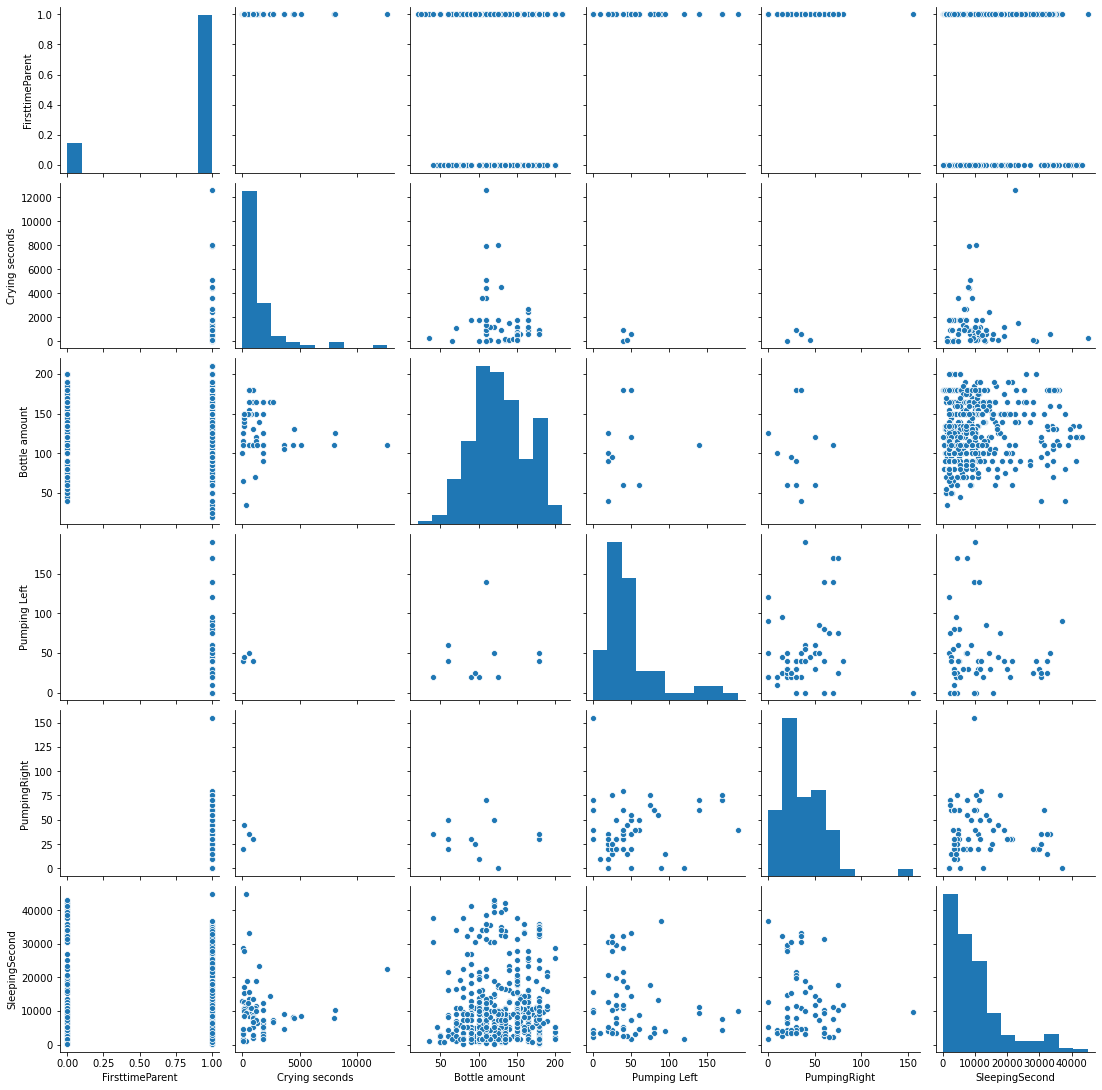

In [16]:
sns.pairplot(dataset)

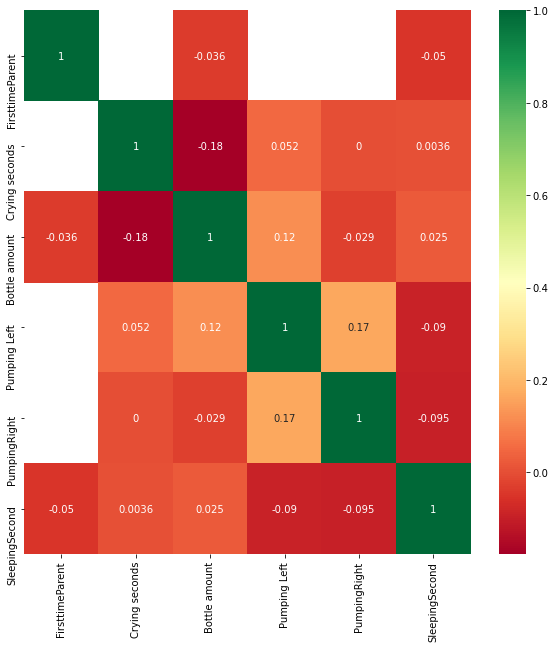

In [17]:
corrmap=dataset.corr()
top_features=corrmap.index
plt.figure(figsize=(10,10))
t=sns.heatmap(dataset[top_features].corr(),annot=True,cmap='RdYlGn')

In [18]:
dataset.isnull().sum()

BabyId                                   0
FirsttimeParent                          0
Crying date                              0
Crying time                              0
Crying seconds                        1700
Feeding date                             0
Feeding time                             0
Bottle amount                          729
PumpingDate                              0
PumpingTimePumpingLeftPumpingRight       0
Pumping Left                          1712
PumpingRight                          1705
SleepingDate                             0
SleepingTime                             0
SleepingSecond                         777
dtype: int64

In [19]:
dataset.drop('Crying seconds',axis=1,inplace=True)
dataset.drop('Pumping Left',axis=1,inplace=True)
dataset.drop('PumpingRight',axis=1,inplace=True)
dataset.drop('Bottle amount',axis=1,inplace=True)
dataset.drop('SleepingSecond',axis=1,inplace=True)

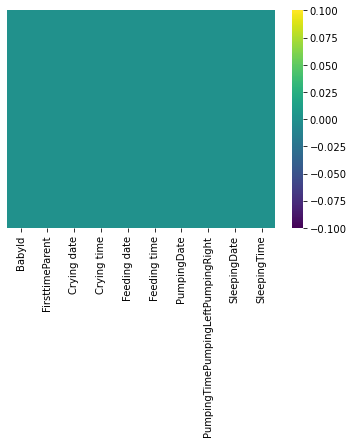

In [20]:
#After removing columns containing maximum NULL values
sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

In [21]:
dataset['Crying date']=pd.to_datetime(dataset['Crying date'],infer_datetime_format=True)
dataset['Feeding date']=pd.to_datetime(dataset['Feeding date'],infer_datetime_format=True)
dataset['PumpingDate']=pd.to_datetime(dataset['PumpingDate'],infer_datetime_format=True)
dataset['SleepingDate']=pd.to_datetime(dataset['SleepingDate'],infer_datetime_format=True)

In [22]:
dataset.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Feeding date,Feeding time,PumpingDate,PumpingTimePumpingLeftPumpingRight,SleepingDate,SleepingTime
0,HPT2_NR_16,1,2015-05-08,20:31:47,2015-05-08,20:31:47,2015-05-08,20:31:47,2015-05-08,20:31:47
1,HPT2_NR_16,1,2015-05-08,23:33:46,2015-05-08,23:33:46,2015-05-08,23:33:46,2015-05-08,23:33:46
2,HPT2_NR_16,1,2015-06-08,10:20:00,2015-06-08,10:20:00,2015-06-08,10:20:00,2015-06-08,10:20:00
3,HPT2_NR_16,1,2015-06-08,11:30:00,2015-06-08,11:30:00,2015-06-08,11:30:00,2015-06-08,11:30:00
4,HPT2_NR_16,1,2015-06-08,12:15:00,2015-06-08,12:15:00,2015-06-08,12:15:00,2015-06-08,12:15:00


In [23]:

def getDuplicateColumns(dataset):
    duplicateColumnNames = set()
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            otherCol = df.iloc[:, y]
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [24]:
    df = pd.DataFrame(dataset)
    duplicateColNames = getDuplicateColumns(df)
    print('Duplicate Columns are :')
    for column in duplicateColNames :
       print('Column Name : ', column)

Duplicate Columns are :
Column Name :  PumpingTimePumpingLeftPumpingRight
Column Name :  SleepingTime
Column Name :  Feeding time
Column Name :  PumpingDate
Column Name :  SleepingDate
Column Name :  Feeding date


In [25]:
dataset['crying/sleeping/pumping/feeding_date']=dataset['Crying date']

In [26]:
dataset.drop(['Crying date','Feeding date','PumpingDate','SleepingDate'],axis=1,inplace=True)

In [27]:
dataset['crying/sleeping/pumping/feeding_time']=dataset['Crying time']

In [28]:
dataset.drop(['Crying time','Feeding time','PumpingTimePumpingLeftPumpingRight','SleepingTime'],axis=1,inplace=True)

In [29]:
dataset["BabyId"]= dataset["BabyId"].str.slice(8)

In [30]:
dataset.head()

,BabyId,FirsttimeParent,crying/sleeping/pumping/feeding_date,crying/sleeping/pumping/feeding_time
0,16,1,2015-05-08,20:31:47
1,16,1,2015-05-08,23:33:46
2,16,1,2015-06-08,10:20:00
3,16,1,2015-06-08,11:30:00
4,16,1,2015-06-08,12:15:00


In [31]:
dataset['crying/sleeping/pumping/feeding_date'] = pd.to_numeric(pd.to_datetime(dataset['crying/sleeping/pumping/feeding_date']))
dataset['crying/sleeping/pumping/feeding_time'] = pd.to_numeric(pd.to_datetime(dataset['crying/sleeping/pumping/feeding_time']))

In [32]:
dataset['Firsttimeparents']=dataset['FirsttimeParent']
dataset.drop('FirsttimeParent',axis=1)

,BabyId,crying/sleeping/pumping/feeding_date,crying/sleeping/pumping/feeding_time,Firsttimeparents
0,16,1431043200000000000,1625517107000000000,1
1,16,1431043200000000000,1625528026000000000,1
2,16,1433721600000000000,1625480400000000000,1
3,16,1433721600000000000,1625484600000000000,1
4,16,1433721600000000000,1625487300000000000,1
...,...,...,...,...
1768,33,1440028800000000000,1625517000000000000,1
1769,33,1440115200000000000,1625443200000000000,1
1770,33,1440115200000000000,1625459400000000000,1
1771,33,1440115200000000000,1625475600000000000,1


## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
X=dataset.drop('Firsttimeparents',axis=1)
y=dataset['Firsttimeparents']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30,random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

In [36]:
type(dataset)

pandas.core.frame.DataFrame

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [38]:
results = confusion_matrix(y_test, predictions) 
results

array([[ 87,   0],
       [445,   0]], dtype=int64)

In [39]:
accuracy_score(y_test, predictions) 

0.16353383458646617

In [40]:
import plotly.express as hpx

ModuleNotFoundError: No module named 'plotly'